# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



In [ ]:
from google.colab import drive
drive.mount('/content/drive')
prefix = '/content/drive/MyDrive/Colab Notebooks/module17_starter/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [ ]:
# The dataset collected is related to 17 campaigns that
# occurred between May 2008 and November 2010,
# corresponding to a total of 79354 contacts.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [ ]:
import pandas as pd

In [ ]:
path = 'data/bank-additional-full.csv'
try:
  path = prefix + path
except NameError:
  pass

df = pd.read_csv(path, sep = ';')

image_path = 'images/'
try:
  image_path = prefix + image_path
except NameError:
  pass

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [ ]:
# look at all the unique categorical values:

categorical_cols = df.select_dtypes(include=['object']).columns

summary = pd.DataFrame({
    'Column': categorical_cols,
    'Type': df[categorical_cols].dtypes.values,
    'Unique_Count': [df[col].nunique() for col in categorical_cols],
    'Sample_Values': [df[col].unique() for col in categorical_cols]
})

print(summary.to_string(index=False))

     Column   Type  Unique_Count                                                                                                                          Sample_Values
        job object            12 [housemaid, services, admin., blue-collar, technician, retired, management, unemployed, self-employed, unknown, entrepreneur, student]
    marital object             4                                                                                                   [married, single, divorced, unknown]
  education object             8                               [basic.4y, high.school, basic.6y, basic.9y, professional.course, unknown, university.degree, illiterate]
    default object             3                                                                                                                     [no, unknown, yes]
    housing object             3                                                                                                                     [no, yes, u

In [ ]:
print("Categorical Feature Cardinality:\n" + "="*50)
for col in categorical_cols:
    n_unique = df[col].nunique()
    print(f"\n{col}: {n_unique} unique values")
    print(df[col].value_counts())
    print("-"*50)

Categorical Feature Cardinality:

job: 12 unique values
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64
--------------------------------------------------

marital: 4 unique values
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64
--------------------------------------------------

education: 8 unique values
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64
--------------------------------------------------

default: 3 unique values
default
no         32588
unknow

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
# Business Objective:
#
# Problem: Portuguese bank conducts telephone marketing campaigns with only 11.3%
# success rate, resulting in high costs and customer dissatisfaction.
#
# Goal: Develop a classification model to predict term deposit subscription
# probability using client demographics, campaign history, and economic indicators.
#
# Success Criteria:
# - F1-Score > 0.50 (balancing precision and recall for imbalanced data)
# - Enable 50% reduction in calls while capturing 60%+ of potential subscribers
# - Deploy model to score clients before each campaign for targeted outreach

Class Distribution:
y
no     36548
yes     4640
Name: count, dtype: int64

Class Imbalance Ratio: 7.9:1


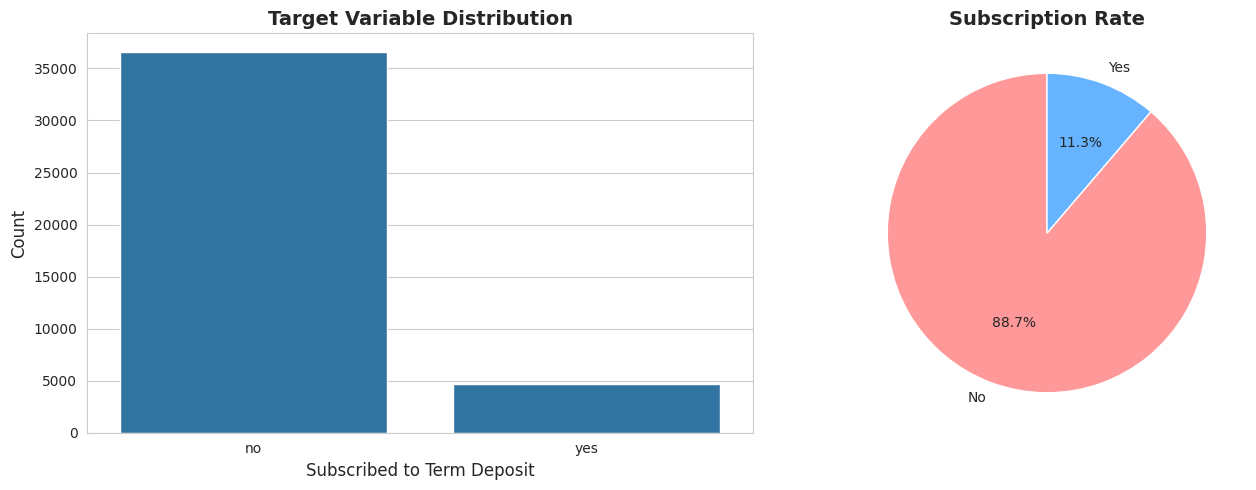

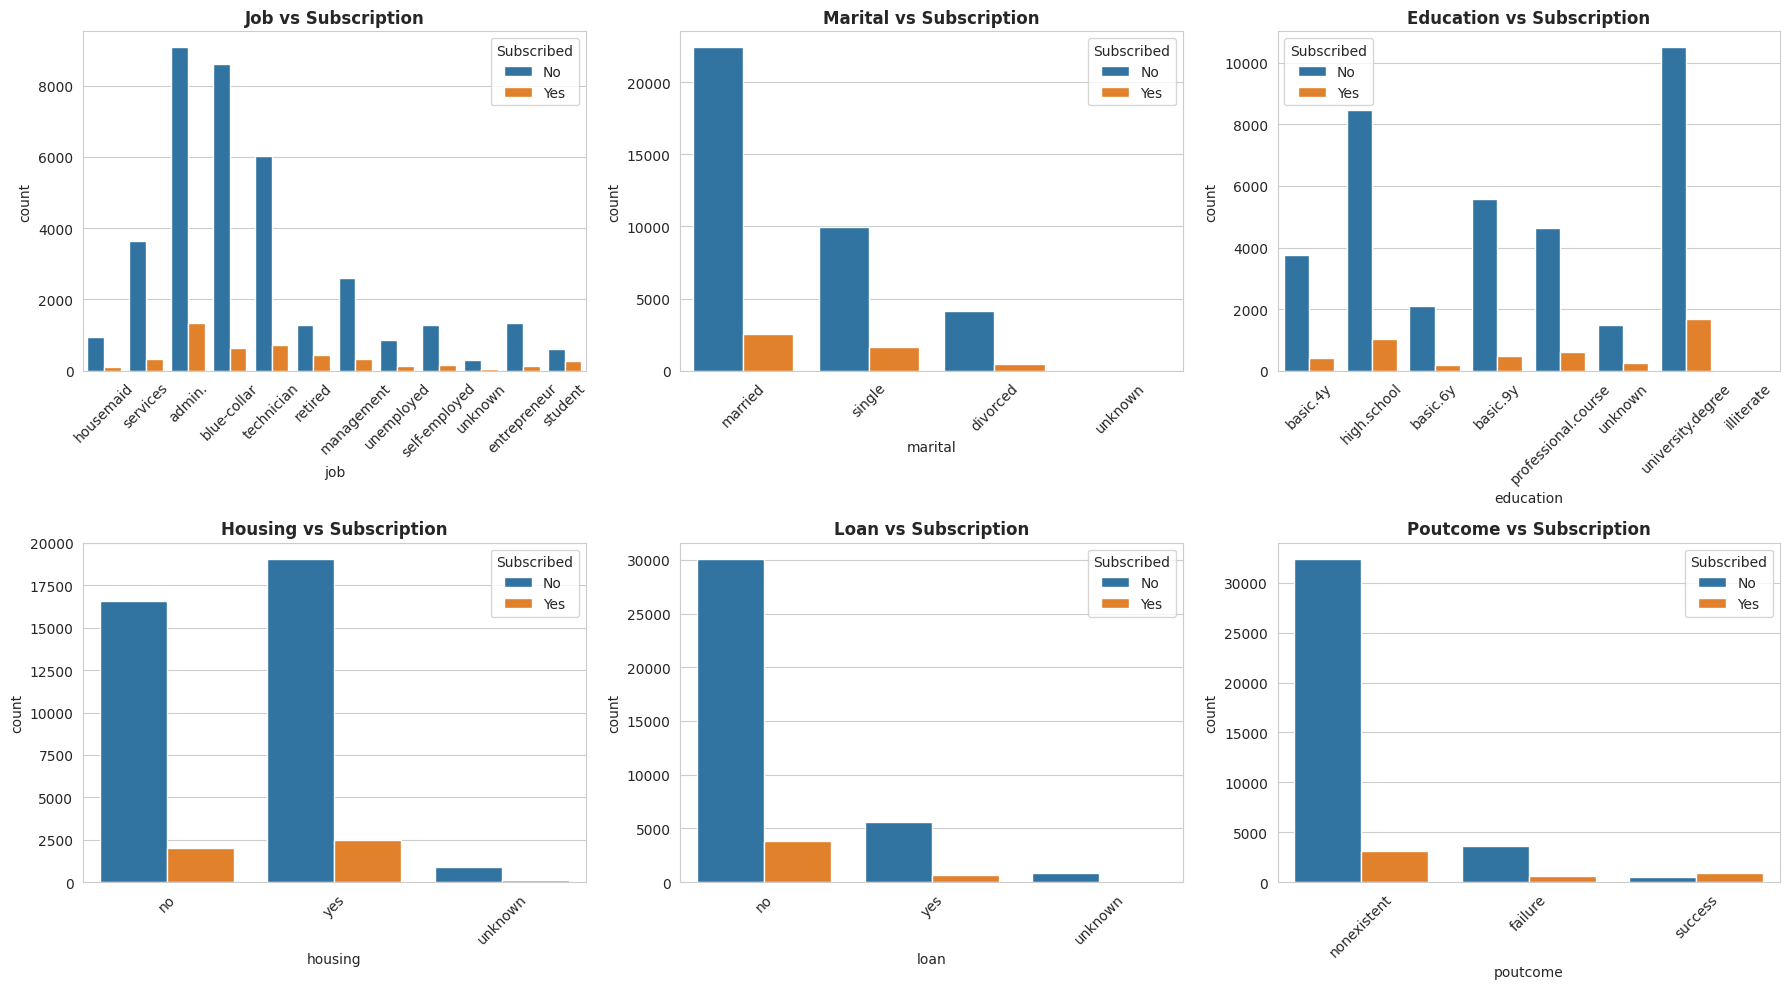

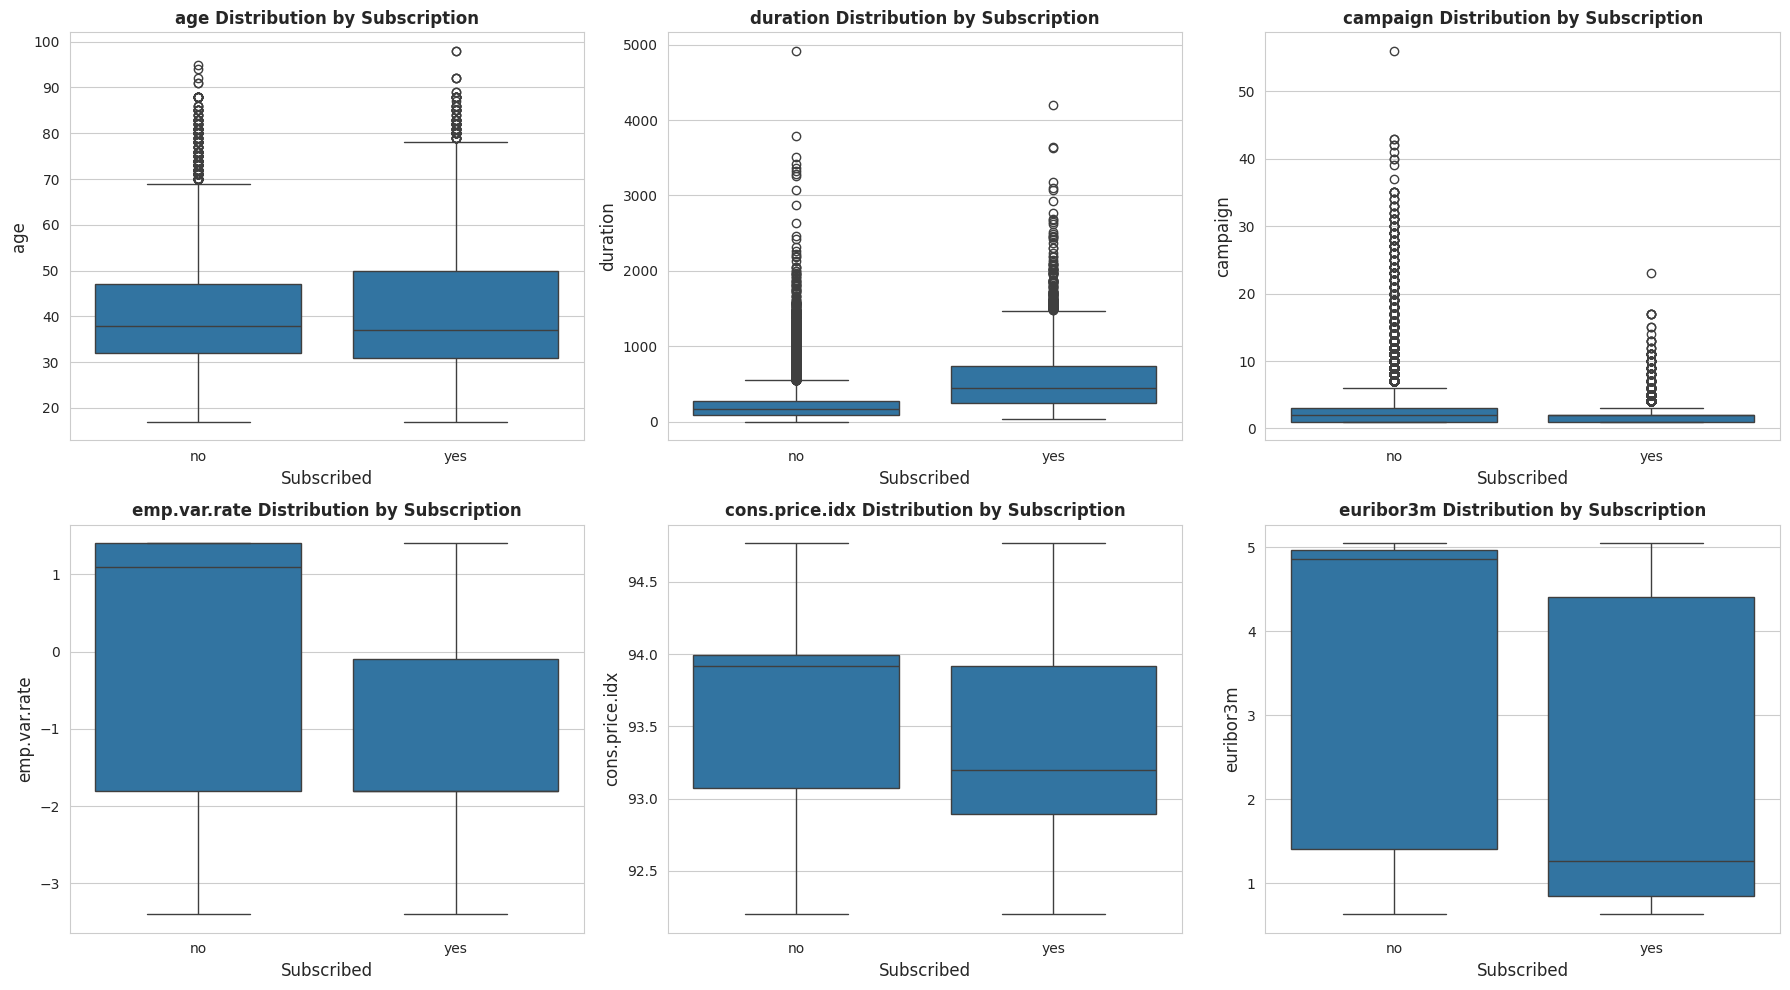

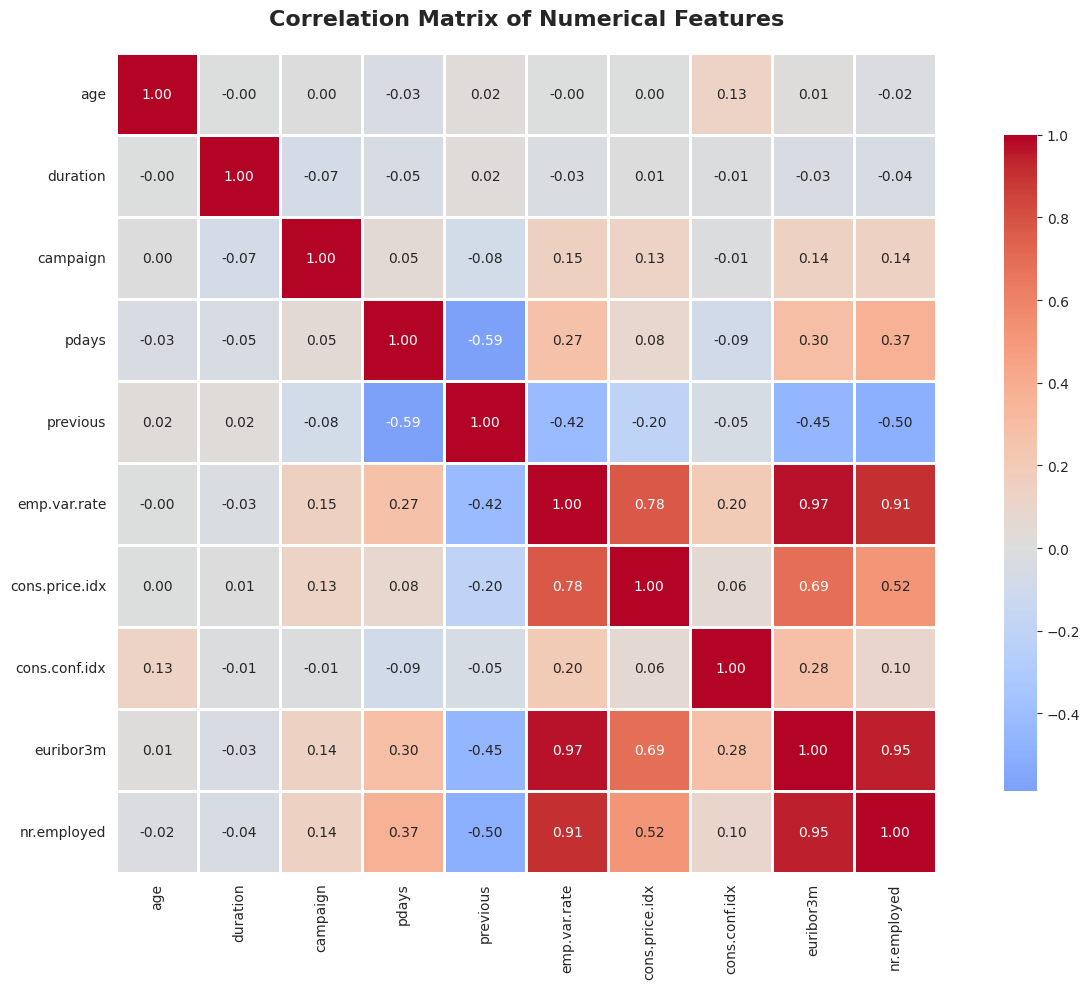

In [ ]:
## Exploratory Data Analysis

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

### Target Variable Distribution
print("Class Distribution:")
print(df['y'].value_counts())
print(f"\nClass Imbalance Ratio: {df['y'].value_counts()['no'] / df['y'].value_counts()['yes']:.1f}:1")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
sns.countplot(data=df, x='y', ax=axes[0])
axes[0].set_title('Target Variable Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Subscribed to Term Deposit', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)

# Pie chart
y_counts = df['y'].value_counts()
colors = ['#ff9999', '#66b3ff']
axes[1].pie(y_counts, labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90, colors=colors)
axes[1].set_title('Subscription Rate', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig(image_path + 'Target_distro_and_rate.png')
plt.show()

### Categorical Features Analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
categorical_features = ['job', 'marital', 'education', 'housing', 'loan', 'poutcome']

for idx, col in enumerate(categorical_features):
    row, col_idx = idx // 3, idx % 3
    sns.countplot(data=df, x=col, hue='y', ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'{col.title()} vs Subscription', fontsize=12, fontweight='bold')
    axes[row, col_idx].tick_params(axis='x', rotation=45)
    axes[row, col_idx].legend(title='Subscribed', labels=['No', 'Yes'])

plt.tight_layout()
plt.savefig(image_path + 'Categorical_features_analysis.png')
plt.show()

### Numerical Features Analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
numerical_features = ['age', 'duration', 'campaign', 'emp.var.rate', 'cons.price.idx', 'euribor3m']

for idx, col in enumerate(numerical_features):
    row, col_idx = idx // 3, idx % 3
    sns.boxplot(data=df, x='y', y=col, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'{col} Distribution by Subscription', fontsize=12, fontweight='bold')
    axes[row, col_idx].set_xlabel('Subscribed', fontsize=12)
    axes[row, col_idx].set_ylabel(col, fontsize=12)

plt.tight_layout()
plt.savefig(image_path + 'Numerical_features_analysis.png')
plt.show()

### Correlation Heatmap
plt.figure(figsize=(14, 10))
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation = df[numerical_cols].corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig(image_path + 'Correlation_matrix_numerical_features.png')
plt.show()

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [ ]:
# strategy:
# 1. drop imbalanced default column
# 2. Intuition leads me to drop the contact column [telephone, cellular]
# 3. Drop 'unknown' from all categorical columns
# 4. Encode remaining categories
# categorical data encodings:

# ENCODING  | column name
# -----------------------
# one hot   | job
# one hot   | marital
# ordinal   | education
# drop      | default
# onehot    | housing
# onehot    | loan
# drop      | contact
# ordinal   | month
# ordinal   | day_of_week
# onehot    | poutcome
# binary    | y

# 5. Use StandardScalar on numerical columns

In [ ]:
# drop imbalanced default and useless contact columns
df_cleaned = df.drop(columns=['default','contact'])

In [ ]:
df = df_cleaned
# Drop 'unknown' from all categorical columns
df_cleaned = df[~df.isin(['unknown']).any(axis=1)].copy()

# Reset index
df_cleaned.reset_index(drop=True, inplace=True)

# Verify
print(f"Original: {df.shape[0]} rows")
print(f"Cleaned: {df_cleaned.shape[0]} rows")
print(f"Dropped: {df.shape[0] - df_cleaned.shape[0]} rows ({(df.shape[0] - df_cleaned.shape[0])/df.shape[0]*100:.1f}%)")


Original: 41188 rows
Cleaned: 38245 rows
Dropped: 2943 rows (7.1%)


In [ ]:
from sklearn.preprocessing import LabelEncoder

df = df_cleaned

# Separate features and target
X = df.drop('y', axis=1)
y = LabelEncoder().fit_transform(df['y'])

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

# Define feature groups
onehot_features = ['marital', 'housing', 'loan', 'poutcome', 'job']
numerical_columns = ['age', 'duration', 'campaign', 'pdays', 'previous',
                     'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
                     'euribor3m', 'nr.employed']

# Education order
education_categories = [[
    'illiterate', 'basic.4y', 'basic.6y', 'basic.9y',
    'high.school', 'professional.course', 'university.degree'
]]
# Month order
month_categories = [[
    'jan', 'feb', 'mar', 'apr', 'may', 'jun',
    'jul', 'aug', 'sep', 'oct', 'nov', 'dec'
]]
# Day of week order
day_categories = [[
    'mon', 'tue', 'wed', 'thu', 'fri'
]]


# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'),
         onehot_features),
        ('scaler', StandardScaler(), numerical_columns),
        ('ordinal_edu', OrdinalEncoder(categories=education_categories), ['education']),
        ('ordinal_month', OrdinalEncoder(categories=month_categories), ['month']),
        ('ordinal_day', OrdinalEncoder(categories=day_categories), ['day_of_week'])
    ],
    remainder='drop'
)

# Fit and transform
X_transformed = preprocessor.fit_transform(X)

# # Convert to DataFrames
X = pd.DataFrame(X_transformed, columns=preprocessor.get_feature_names_out())
print(f"Features: {len(preprocessor.get_feature_names_out())}")

X.tail()

Features: 29


,onehot__marital_married,onehot__marital_single,onehot__housing_yes,onehot__loan_yes,onehot__poutcome_nonexistent,onehot__poutcome_success,onehot__job_blue-collar,onehot__job_entrepreneur,onehot__job_housemaid,onehot__job_management,...,scaler__pdays,scaler__previous,scaler__emp.var.rate,scaler__cons.price.idx,scaler__cons.conf.idx,scaler__euribor3m,scaler__nr.employed,ordinal_edu__education,ordinal_month__month,ordinal_day__day_of_week
38240,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.192456,-0.348978,-0.755375,2.076287,-2.219019,-1.499996,-2.8405,5.0,10.0,4.0
38241,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.192456,-0.348978,-0.755375,2.076287,-2.219019,-1.499996,-2.8405,5.0,10.0,4.0
38242,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.192456,-0.348978,-0.755375,2.076287,-2.219019,-1.499996,-2.8405,6.0,10.0,4.0
38243,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.192456,-0.348978,-0.755375,2.076287,-2.219019,-1.499996,-2.8405,5.0,10.0,4.0
38244,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.192456,1.703723,-0.755375,2.076287,-2.219019,-1.499996,-2.8405,5.0,10.0,4.0


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [ ]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 80% train, 20% test
    stratify=y,          # Maintain class balance
    random_state=42      # Reproducibility
)


print(f"Training shape: {X_train.shape}")
print(f"Test shape: {X_test.shape}")

print(f"\nTarget distribution:")
print(f"Train - No: {sum(y_train==0)}, Yes: {sum(y_train==1)}")
print(f"Test - No: {sum(y_test==0)}, Yes: {sum(y_test==1)}")

Training shape: (30596, 29)
Test shape: (7649, 29)

Target distribution:
Train - No: 27190, Yes: 3406
Test - No: 6797, Yes: 852


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [ ]:
from sklearn.dummy import DummyClassifier
baseline = DummyClassifier(strategy='most_frequent')
baseline.fit(X_train, y_train)
baseline.score(X_test, y_test)


0.8886128905739312

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)


LogisticRegression()

### Problem 9: Score the Model

What is the accuracy of your model?

In [ ]:
logistic_regression.score(X_test, y_test)

0.910838018041574

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import time

In [ ]:
# Define models and their hyperparameters
default_models = {
    'default_knn': KNeighborsClassifier(),
    'default_logisticregression': LogisticRegression(),
    'default_svc': SVC(),
    'default_decisiontree': DecisionTreeClassifier(),
}
default_results = []

for name, model in default_models.items():

    # Fit the model and time it
    start_time = time.time()
    model.fit(X_train, y_train)
    fit_time = time.time() - start_time


    # Evaluate on training and test sets
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    # Append the results
    default_results.append([name, fit_time, train_score, test_score])

# Create the results DataFrame
results_df = pd.DataFrame(default_results, columns=['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy'])
results_df.set_index('Model', inplace=True)
results_df


,Train Time,Train Accuracy,Test Accuracy
Model,,,
default_knn,0.006842,0.928945,0.903517
default_logisticregression,0.810887,0.909204,0.910838
default_svc,17.082735,0.909629,0.907047
default_decisiontree,0.218370,1.000000,0.890182


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.


- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

# Define models and their hyperparameters
models = {
    'knn': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
    'logisticregression': (LogisticRegression(max_iter=1000), {'C': [0.1, 1, 10]}),
    'svc': (SVC(), {'kernel': ['linear', 'rbf']}),
    'decisiontree': (DecisionTreeClassifier(), {'max_depth': [5, 10, 15]})
}
results = []

for name, (model, params) in models.items():
    print(f"Training {name}...")
    # Perform grid search
    grid_search = GridSearchCV(
        model,
        param_grid=params,
        cv=5,
        n_jobs=-1
    )

    # Fit the model and time it
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    fit_time = time.time() - start_time

    # Get the best estimator
    best_model = grid_search.best_estimator_

    # Make predictions
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)


    # Calculate metrics
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    # Append the results
    results.append({
        'Model': name,
        'Fit Time': fit_time,
        'Best Params': grid_search.best_params_,
        'Train Time (s)': round(fit_time, 2),
        'Train Acc': round(train_acc, 4),
        'Test Acc': round(test_acc, 4),
        'Precision': round(test_precision, 4),
        'Recall': round(test_recall, 4),
        'F1-Score': round(test_f1, 4),
    })


# Create the results DataFrame
results_df = pd.DataFrame(results, columns=[
    'Model',
    'Fit Time',
    'Best Params',
    'Train Time (s)',
    'Train Acc',
    'Test Acc',
    'Precision',
    'Recall',
    'F1-Score'])
results_df.set_index('Model', inplace=True)
results_df

Training knn...
Training logisticregression...
Training svc...
Training decisiontree...


,Fit Time,Best Params,Train Time (s),Train Acc,Test Acc,Precision,Recall,F1-Score
Model,,,,,,,,
knn,18.111238,{'n_neighbors': 7},18.11,0.9238,0.9061,0.6218,0.4014,0.4879
logisticregression,3.556868,{'C': 0.1},3.56,0.9093,0.9116,0.6686,0.4096,0.5080
svc,170.092986,{'kernel': 'rbf'},170.09,0.9096,0.9070,0.6822,0.3099,0.4262
decisiontree,1.788896,{'max_depth': 5},1.79,0.9168,0.9161,0.6346,0.5810,0.6066


In [ ]:
# Show the results table
print("Model Performance Results:")
print(results_df)

Model Performance Results:
                      Fit Time         Best Params  Train Time (s)  Train Acc  \
Model                                                                           
knn                  18.111238  {'n_neighbors': 7}           18.11     0.9238   
logisticregression    3.556868          {'C': 0.1}            3.56     0.9093   
svc                 170.092986   {'kernel': 'rbf'}          170.09     0.9096   
decisiontree          1.788896    {'max_depth': 5}            1.79     0.9168   

                    Test Acc  Precision  Recall  F1-Score  
Model                                                      
knn                   0.9061     0.6218  0.4014    0.4879  
logisticregression    0.9116     0.6686  0.4096    0.5080  
svc                   0.9070     0.6822  0.3099    0.4262  
decisiontree          0.9161     0.6346  0.5810    0.6066  


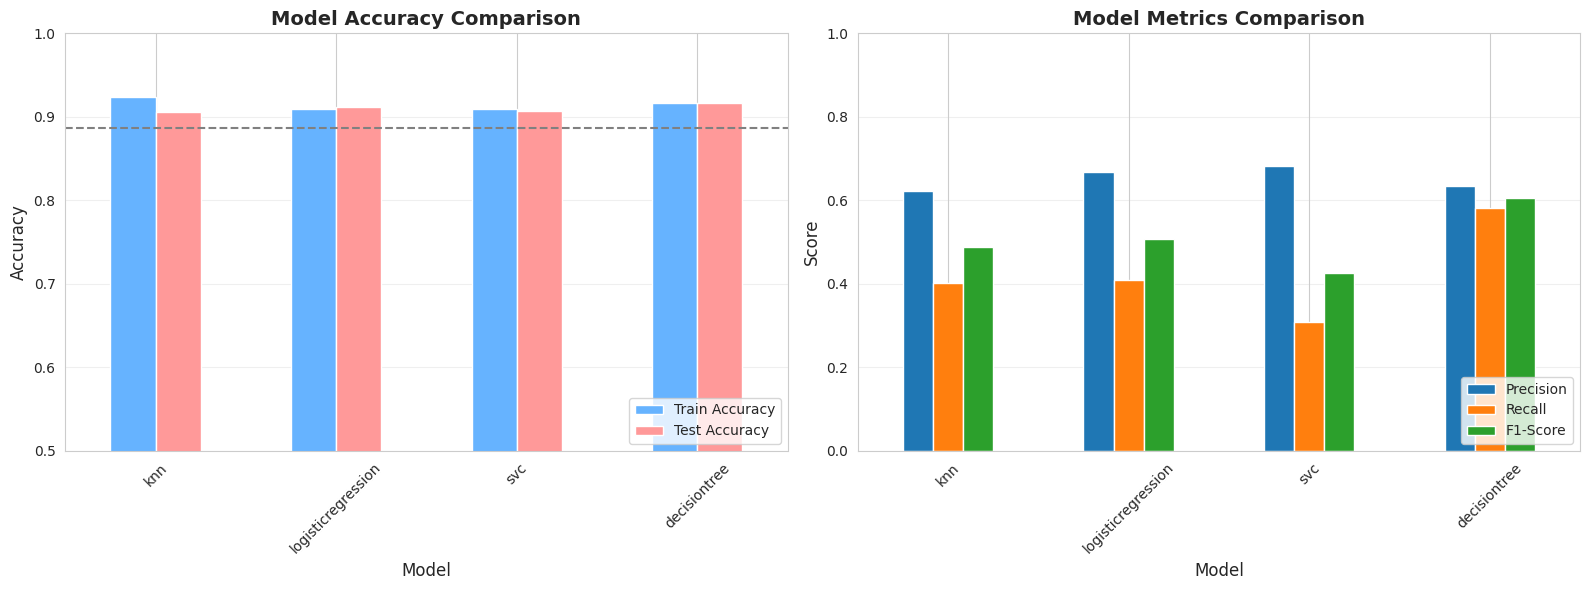

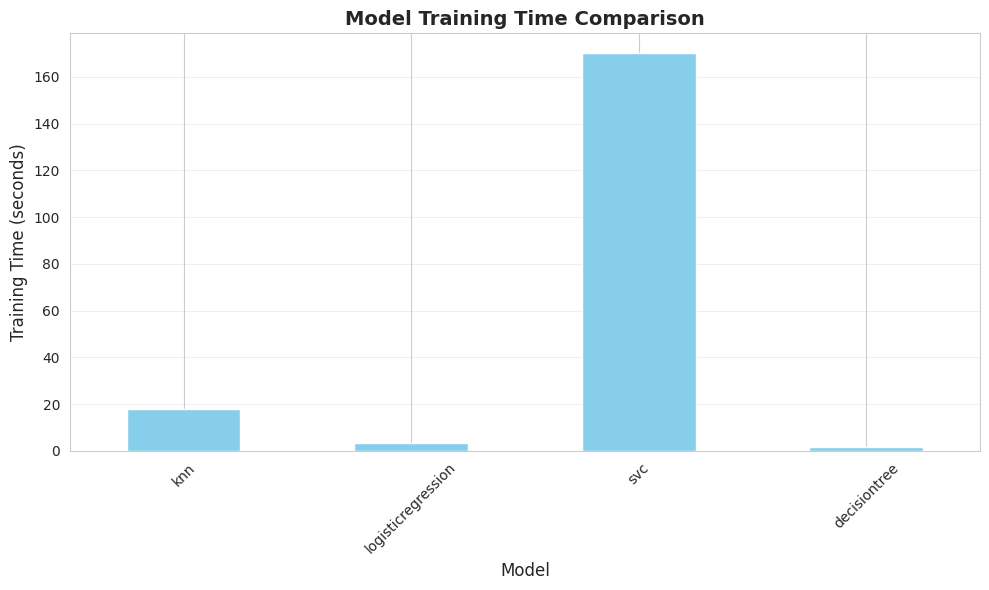


BEST MODEL SUMMARY
   Best Performing Model: DECISIONTREE
   F1-Score: 0.6066
   Test Accuracy: 0.9161
   Precision: 0.6346
   Recall: 0.5810
   Training Time: 1.79s


In [90]:
### Model Performance Comparison

import matplotlib.pyplot as plt
import seaborn as sns

# Accuracy Comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Accuracy comparison
results_df[['Train Acc', 'Test Acc']].plot(kind='bar', ax=axes[0], color=['#66b3ff', '#ff9999'])
axes[0].set_title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].set_xlabel('Model', fontsize=12)
axes[0].legend(['Train Accuracy', 'Test Accuracy'], loc='lower right')
axes[0].set_ylim([0.5, 1.0])
axes[0].tick_params(axis='x', rotation=45)
axes[0].axhline(y=0.887, color='gray', linestyle='--', label='Baseline (88.7%)')
axes[0].grid(axis='y', alpha=0.3)

# Plot 2: Precision, Recall, F1-Score comparison
results_df[['Precision', 'Recall', 'F1-Score']].plot(kind='bar', ax=axes[1])
axes[1].set_title('Model Metrics Comparison', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Score', fontsize=12)
axes[1].set_xlabel('Model', fontsize=12)
axes[1].legend(['Precision', 'Recall', 'F1-Score'], loc='lower right')
axes[1].set_ylim([0, 1.0])
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig(image_path + 'Model_acc_metrics_compare.png')
plt.show()

# Training Time Comparison
plt.figure(figsize=(10, 6))
results_df['Train Time (s)'].plot(kind='bar', color='skyblue')
plt.title('Model Training Time Comparison', fontsize=14, fontweight='bold')
plt.ylabel('Training Time (seconds)', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig(image_path + 'Model_training_time_compare.png')
plt.show()

print("\n" + "="*60)
print("BEST MODEL SUMMARY")
print("="*60)
best_model = results_df['F1-Score'].idxmax()
print(f"   Best Performing Model: {best_model.upper()}")
print(f"   F1-Score: {results_df.loc[best_model, 'F1-Score']:.4f}")
print(f"   Test Accuracy: {results_df.loc[best_model, 'Test Acc']:.4f}")
print(f"   Precision: {results_df.loc[best_model, 'Precision']:.4f}")
print(f"   Recall: {results_df.loc[best_model, 'Recall']:.4f}")
print(f"   Training Time: {results_df.loc[best_model, 'Train Time (s)']:.2f}s")
print("="*60)

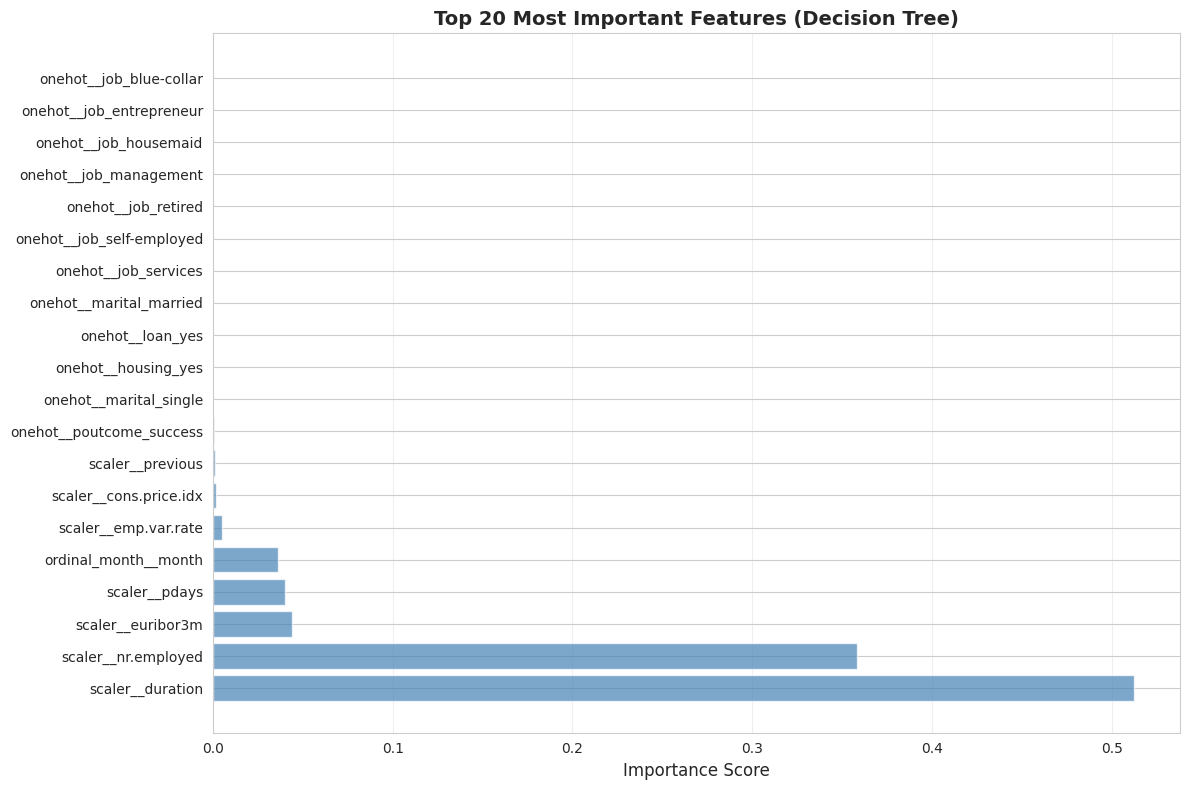

In [95]:
# For Decision Tree - Feature Importance
from sklearn.tree import DecisionTreeClassifier


dt_grid = GridSearchCV(
    DecisionTreeClassifier(),
    {'max_depth': [5, 10, 15]},
    cv=5
)
dt_grid.fit(X_train, y_train)
best_dt = dt_grid.best_estimator_

# Get feature importance
feature_importance_dt = pd.DataFrame({
    'Feature': feature_names,
    'Importance': best_dt.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot top 20
plt.figure(figsize=(12, 8))
top_20_dt = feature_importance_dt.head(20)
plt.barh(range(len(top_20_dt)), top_20_dt['Importance'], color='steelblue', alpha=0.7)
plt.yticks(range(len(top_20_dt)), top_20_dt['Feature'], fontsize=10)
plt.xlabel('Importance Score', fontsize=12)
plt.title('Top 20 Most Important Features (Decision Tree)', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig(image_path + 'DT_Feature_importance.png')
plt.show()
